LOOKALIKE

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
customers_df = pd.read_csv('/kaggle/input/ecommerce-data/Customers.csv')
products_df = pd.read_csv('/kaggle/input/ecommerce-data/Products.csv')
transactions_df = pd.read_csv('/kaggle/input/ecommerce-data/Transactions.csv')

In [3]:
merged_df = pd.merge(transactions_df, customers_df, on='CustomerID', how='left')
merged_df = pd.merge(merged_df, products_df, on='ProductID', how='left')
print(merged_df.head())

  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue  Price_x     CustomerName         Region  SignupDate  \
0      300.68   300.68   Andrea Jenkins         Europe  2022-12-03   
1      300.68   300.68  Brittany Harvey           Asia  2024-09-04   
2      300.68   300.68  Kathryn Stevens         Europe  2024-04-04   
3      601.36   300.68  Travis Campbell  South America  2024-04-11   
4      902.04   300.68    Timothy Perez         Europe  2022-03-15   

                       ProductName     Category  Price_y  
0  ComfortLiving Bluetooth Speaker  Electronics   300.68  
1  ComfortLiving Bluetooth Speaker

In [4]:
merged_df.to_csv('Merged_Data.csv', index=False)

In [5]:
from datetime import datetime

merged_df['SignupDate'] = pd.to_datetime(merged_df['SignupDate'])
merged_df['Tenure'] = (datetime.now() - merged_df['SignupDate']).dt.days

customer_profile = merged_df.groupby('CustomerID').agg({
    'Region': 'first',  # Demographic feature
    'Tenure': 'first',  # Demographic feature
    'TransactionID': 'count',  # Behavioral feature: total transactions
    'TotalValue': 'sum',  # Behavioral feature: total spending
    'Quantity': 'sum',  # Behavioral feature: total quantity purchased
    'Category': lambda x: x.mode()[0]  # Behavioral feature: favorite category
}).reset_index()

customer_profile.rename(columns={
    'TransactionID': 'TotalTransactions',
    'TotalValue': 'TotalSpending',
    'Category': 'FavoriteCategory'
}, inplace=True)

print(customer_profile.head())

  CustomerID         Region  Tenure  TotalTransactions  TotalSpending  \
0      C0001  South America     934                  5        3354.52   
1      C0002           Asia    1081                  4        1862.74   
2      C0003  South America     328                  4        2725.38   
3      C0004  South America     843                  8        5354.88   
4      C0005           Asia     898                  3        2034.24   

   Quantity FavoriteCategory  
0        12      Electronics  
1        10         Clothing  
2        14       Home Decor  
3        23            Books  
4         7      Electronics  


In [6]:
customer_profile = pd.get_dummies(customer_profile, columns=['Region', 'FavoriteCategory'], drop_first=True)

print(customer_profile.head())

  CustomerID  Tenure  TotalTransactions  TotalSpending  Quantity  \
0      C0001     934                  5        3354.52        12   
1      C0002    1081                  4        1862.74        10   
2      C0003     328                  4        2725.38        14   
3      C0004     843                  8        5354.88        23   
4      C0005     898                  3        2034.24         7   

   Region_Europe  Region_North America  Region_South America  \
0          False                 False                  True   
1          False                 False                 False   
2          False                 False                  True   
3          False                 False                  True   
4          False                 False                 False   

   FavoriteCategory_Clothing  FavoriteCategory_Electronics  \
0                      False                          True   
1                       True                         False   
2                   

In [7]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
numerical_features = ['Tenure', 'TotalTransactions', 'TotalSpending', 'Quantity']
customer_profile[numerical_features] = scaler.fit_transform(customer_profile[numerical_features])

print(customer_profile.head())

  CustomerID    Tenure  TotalTransactions  TotalSpending  Quantity  \
0      C0001  0.842204                0.4       0.308942  0.354839   
1      C0002  0.979458                0.3       0.168095  0.290323   
2      C0003  0.276377                0.3       0.249541  0.419355   
3      C0004  0.757236                0.7       0.497806  0.709677   
4      C0005  0.808590                0.2       0.184287  0.193548   

   Region_Europe  Region_North America  Region_South America  \
0          False                 False                  True   
1          False                 False                 False   
2          False                 False                  True   
3          False                 False                  True   
4          False                 False                 False   

   FavoriteCategory_Clothing  FavoriteCategory_Electronics  \
0                      False                          True   
1                       True                         False   
2       

In [8]:
from sklearn.metrics.pairwise import cosine_similarity

customer_features = customer_profile.drop(columns=['CustomerID'])

similarity_matrix = cosine_similarity(customer_features)

similarity_df = pd.DataFrame(similarity_matrix, index=customer_profile['CustomerID'], columns=customer_profile['CustomerID'])

print(similarity_df.head())

CustomerID     C0001     C0002     C0003     C0004     C0005     C0006  \
CustomerID                                                               
C0001       1.000000  0.425493  0.579095  0.787703  0.807708  0.770086   
C0002       0.425493  1.000000  0.230001  0.503229  0.480747  0.326745   
C0003       0.579095  0.230001  1.000000  0.707682  0.199312  0.757266   
C0004       0.787703  0.503229  0.707682  1.000000  0.440262  0.935109   
C0005       0.807708  0.480747  0.199312  0.440262  1.000000  0.290561   

CustomerID     C0007     C0008     C0009     C0010  ...     C0191     C0192  \
CustomerID                                          ...                       
C0001       0.810589  0.298605  0.196858  0.302921  ...  0.753466  0.993658   
C0002       0.499645  0.305616  0.700057  0.782935  ...  0.288601  0.387539   
C0003       0.211966  0.595902  0.100926  0.183437  ...  0.758591  0.559278   
C0004       0.464192  0.484411  0.229059  0.384621  ...  0.923174  0.733774   
C0005  

In [9]:
def get_top_similar_customers(customer_id, similarity_df, top_n=3):
    similar_customers = similarity_df[customer_id].sort_values(ascending=False)
    
    similar_customers = similar_customers.drop(customer_id).head(top_n)
    
    return similar_customers

top_similar_customers = {}
for customer_id in customer_profile['CustomerID'].iloc[:20]:
    top_similar_customers[customer_id] = get_top_similar_customers(customer_id, similarity_df)

for customer_id, similar_customers in top_similar_customers.items():
    print(f"Top 3 similar customers for {customer_id}:")
    print(similar_customers)
    print()

Top 3 similar customers for C0001:
CustomerID
C0184    0.994086
C0192    0.993658
C0112    0.988424
Name: C0001, dtype: float64

Top 3 similar customers for C0002:
CustomerID
C0134    0.989671
C0040    0.988491
C0106    0.983497
Name: C0002, dtype: float64

Top 3 similar customers for C0003:
CustomerID
C0052    0.996512
C0031    0.995652
C0076    0.995570
Name: C0003, dtype: float64

Top 3 similar customers for C0004:
CustomerID
C0165    0.994295
C0155    0.992348
C0169    0.991901
Name: C0004, dtype: float64

Top 3 similar customers for C0005:
CustomerID
C0007    0.998778
C0140    0.976823
C0186    0.961319
Name: C0005, dtype: float64

Top 3 similar customers for C0006:
CustomerID
C0137    0.991345
C0191    0.989350
C0126    0.987783
Name: C0006, dtype: float64

Top 3 similar customers for C0007:
CustomerID
C0005    0.998778
C0140    0.969515
C0186    0.952568
Name: C0007, dtype: float64

Top 3 similar customers for C0008:
CustomerID
C0059    0.982901
C0065    0.978964
C0189    0.9536

In [10]:
results = []
for customer_id, similar_customers in top_similar_customers.items():
    for similar_customer, score in similar_customers.items():
        results.append({
            'CustomerID': customer_id,
            'SimilarCustomerID': similar_customer,
            'SimilarityScore': score
        })

results_df = pd.DataFrame(results)

results_df.to_csv('Lookalike.csv', index=False)

print(results_df.head())

  CustomerID SimilarCustomerID  SimilarityScore
0      C0001             C0184         0.994086
1      C0001             C0192         0.993658
2      C0001             C0112         0.988424
3      C0002             C0134         0.989671
4      C0002             C0040         0.988491


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


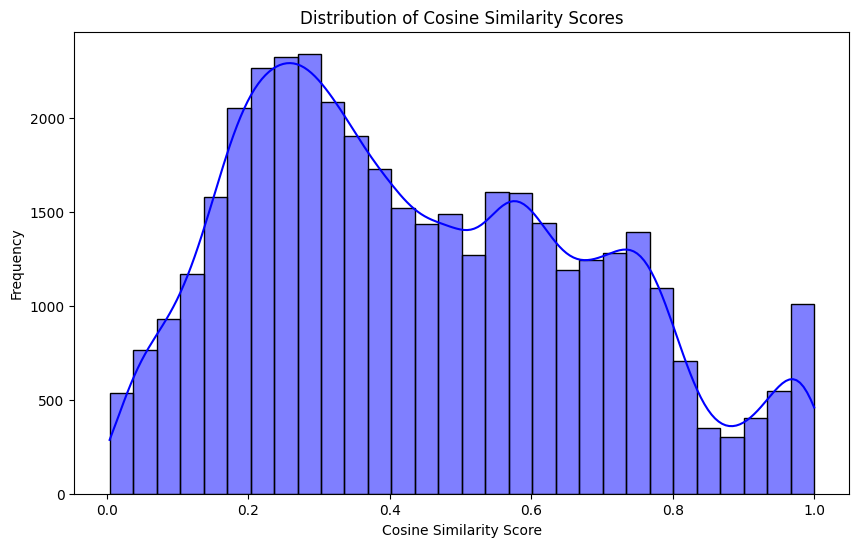

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(similarity_matrix.flatten(), bins=30, kde=True, color='blue')
plt.title('Distribution of Cosine Similarity Scores')
plt.xlabel('Cosine Similarity Score')
plt.ylabel('Frequency')
plt.show()

In [12]:
#top 3 similar customers
def get_top_similar_customers(customer_id, similarity_df, top_n=3):
    similar_customers = similarity_df[customer_id].sort_values(ascending=False)
    similar_customers = similar_customers.drop(customer_id).head(top_n)
    
    return similar_customers

first_20_customers = customer_profile['CustomerID'].iloc[:20]

lookalike_map = {}

for customer_id in first_20_customers:
    similar_customers = get_top_similar_customers(customer_id, similarity_df)
    lookalike_map[customer_id] = list(zip(similar_customers.index, similar_customers.values))

for customer_id, similar_customers in lookalike_map.items():
    print(f"Top 3 similar customers for {customer_id}:")
    for similar_customer, score in similar_customers:
        print(f"  - {similar_customer}: {score:.4f}")

Top 3 similar customers for C0001:
  - C0184: 0.9941
  - C0192: 0.9937
  - C0112: 0.9884
Top 3 similar customers for C0002:
  - C0134: 0.9897
  - C0040: 0.9885
  - C0106: 0.9835
Top 3 similar customers for C0003:
  - C0052: 0.9965
  - C0031: 0.9957
  - C0076: 0.9956
Top 3 similar customers for C0004:
  - C0165: 0.9943
  - C0155: 0.9923
  - C0169: 0.9919
Top 3 similar customers for C0005:
  - C0007: 0.9988
  - C0140: 0.9768
  - C0186: 0.9613
Top 3 similar customers for C0006:
  - C0137: 0.9913
  - C0191: 0.9893
  - C0126: 0.9878
Top 3 similar customers for C0007:
  - C0005: 0.9988
  - C0140: 0.9695
  - C0186: 0.9526
Top 3 similar customers for C0008:
  - C0059: 0.9829
  - C0065: 0.9790
  - C0189: 0.9537
Top 3 similar customers for C0009:
  - C0061: 0.9914
  - C0062: 0.9853
  - C0010: 0.9737
Top 3 similar customers for C0010:
  - C0062: 0.9953
  - C0061: 0.9905
  - C0103: 0.9876
Top 3 similar customers for C0011:
  - C0174: 0.9977
  - C0171: 0.9953
  - C0168: 0.9931
Top 3 similar custome

In [13]:
lookalike_data = []
for customer_id, similar_customers in lookalike_map.items():
    for similar_customer, score in similar_customers:
        lookalike_data.append({
            'CustomerID': customer_id,
            'SimilarCustomerID': similar_customer,
            'SimilarityScore': score
        })

lookalike_df = pd.DataFrame(lookalike_data)

lookalike_df.to_csv('Lookalike.csv', index=False)

print(lookalike_df.head())

  CustomerID SimilarCustomerID  SimilarityScore
0      C0001             C0184         0.994086
1      C0001             C0192         0.993658
2      C0001             C0112         0.988424
3      C0002             C0134         0.989671
4      C0002             C0040         0.988491
